## Predicting Online Shoppers’ Purchasing Intention
#### Author: Rainier Goubault | LinkedIn: https://www.linkedin.com/in/rainiergoubault/

### Objective:
We aim to accomplish building a prediction model that will classify whether user (i.e. customer) intended to make a purchase on online webstore. 


### Introduction:
We have a dataset from an online webstore. Data is formed in such way that each session would correspond to unique user in 1 year period to avoid any tendency. Target variable is called 'Revenue' and takes two values - 0 and 1, measurings customers intention to finalize transaction, i.e. whether or not session ended with purchase. Businesses might be interested in a system which in real time can offer a special offer to customers with positive commercial intention.

Dataset:
The dataset used can be found at: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

### Features Description:
There are 10 numeric and 7 categorical features:

Numeric:

The first six features were derived from the URL information of the pages visited by the user. They were updated each time visitor moved from one page to another till the end of the session.

1. Administrative - Number of pages about account management visited by person
2. Administrative duration - Total amount of time (in seconds) spent by the visitor on administrative pages
3. Informational - Number of pages in session about Web site, communication and address information of the shopping site
4. Informational duration - time (in seconds) spent on informational pages
5. Product related - Number of pages concerning product visited
6. Product related duration - time spent on product related pages


The next three features were measured by "Google Analytics" for each page in the online webstore:

7. Bounce rate - Average bounce rate value of the pages visited by the visitor. Bounce rate itself is percentage of visitors who enter the site from that page and then leave
8. Exit rate - Average exit rate value of the pages visited by the visitor. Value of exit rate for page is percentage of all views of this page that were last in the session
9. Page value - Average page value of the pages visited. Indicates how valuable a specific page is to shop holder in monetary terms
10. Special day - Closeness of the site visiting time to a special day. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

Categorical:

1. OperatingSystems - Operating system of the visitor
2. Browser - Browser of the visitor
3. Region - Geographic region from which the session has been started by the visitor
4. TrafficType - Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)
5. VisitorType - whether the visitor is the new or returning (or not specified)
6. Weekend - Boolean value indicating whether the date of the visit is weekend
7. Month - Month value of the visit date

## Gather Data

In [1]:
# Warning
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import numpy as np 
import pandas as pd

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import mannwhitneyu

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualiation options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_style('white')

# Set notebook options
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', 100) # display 100 rows

In [2]:
online_shoppers = pd.read_csv('online_shoppers_intention.csv')
df = online_shoppers.copy()
print('The dataset has been succesfully imported!')

The dataset has been succesfully imported!


In [3]:
df.shape

(12330, 18)

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.dtypes.value_counts()

int64      7
float64    7
object     2
bool       2
dtype: int64

In [8]:
for feature in df.columns:
    dtype = df[feature].dtype
    if dtype == 'bool':
        df[feature] = df[feature].astype('int64')

In [9]:
df.dtypes.value_counts()

int64      9
float64    7
object     2
dtype: int64

In [10]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [11]:
missing = df.isna()
missing.any()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

## Target Feature

In [12]:
target = df['Revenue']

In [13]:
target.describe()

count    12330.000000
mean         0.154745
std          0.361676
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Revenue, dtype: float64

In [14]:
target_count = target.value_counts()
target_count

0    10422
1     1908
Name: Revenue, dtype: int64

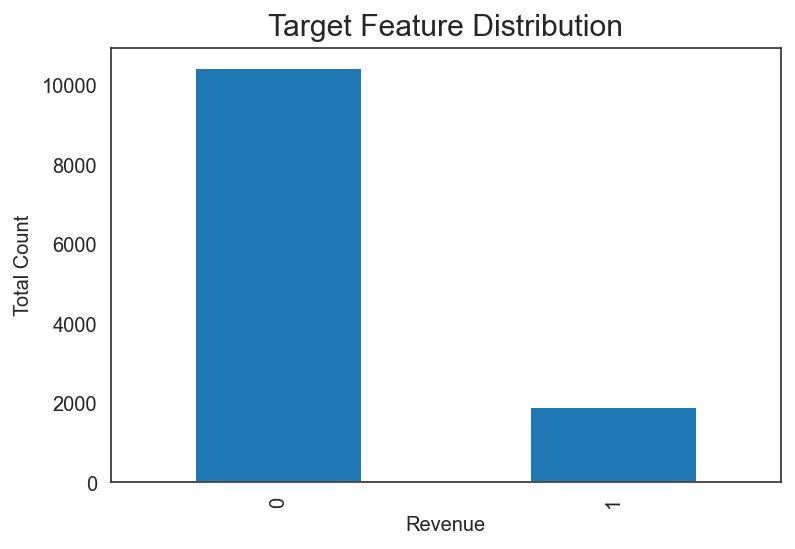

In [15]:
target_count.plot.bar()
plt.xlabel('Revenue')
plt.ylabel('Total Count')
plt.title('Target Feature Distribution', size=15);

In [16]:
target_percent = target.value_counts(normalize=True)
target_percent

0    0.845255
1    0.154745
Name: Revenue, dtype: float64

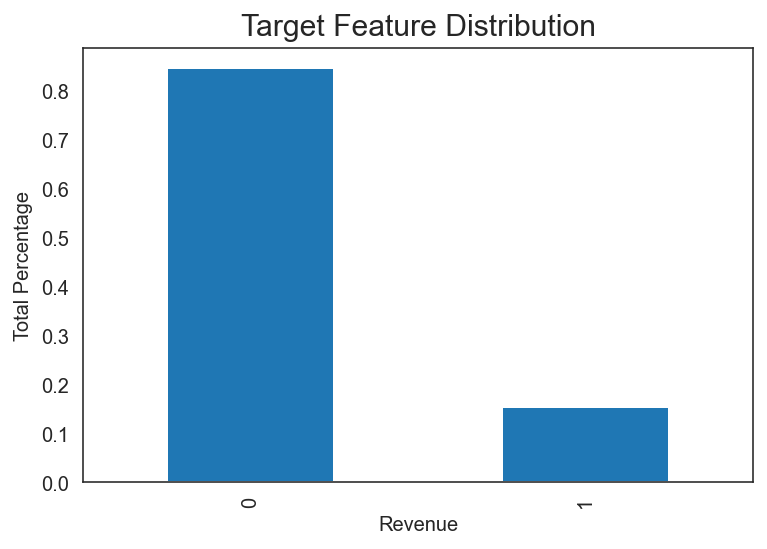

In [17]:
target_percent.plot.bar()
plt.xlabel('Revenue')
plt.ylabel('Total Percentage')
plt.title('Target Feature Distribution', size=15);

In [18]:
no_purchase_count = target_count[0]
no_purchase_percent = target_percent[0] * 100
print(f'The number of customer who visited the webstore but didnt purchase: {no_purchase_count}')
print(f'The percentage of customers who visited the webstore but didnt purchase: {round(no_purchase_percent, 2)} %')

The number of customer who visited the webstore but didnt purchase: 10422
The percentage of customers who visited the webstore but didnt purchase: 84.53 %


In [19]:
purchase_count = target_count[1]
purchase_percent = target_percent[1] * 100
print(f'The number of customer who visited the webstore and purchase: {purchase_count}')
print(f'The percentage of customers who visited the webstore and purchase: {round(purchase_percent, 2)} %')

The number of customer who visited the webstore and purchase: 1908
The percentage of customers who visited the webstore and purchase: 15.47 %


## Numerical Features

In [20]:
num = df.select_dtypes(include='number').columns

In [21]:
print(f'The # of numerical features in the dataset is {len(num)}')

The # of numerical features in the dataset is 16


In [22]:
print(f'The numerical features are:\n\n{num}')

The numerical features are:

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue'],
      dtype='object')


In [23]:
df[num].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0


In [24]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


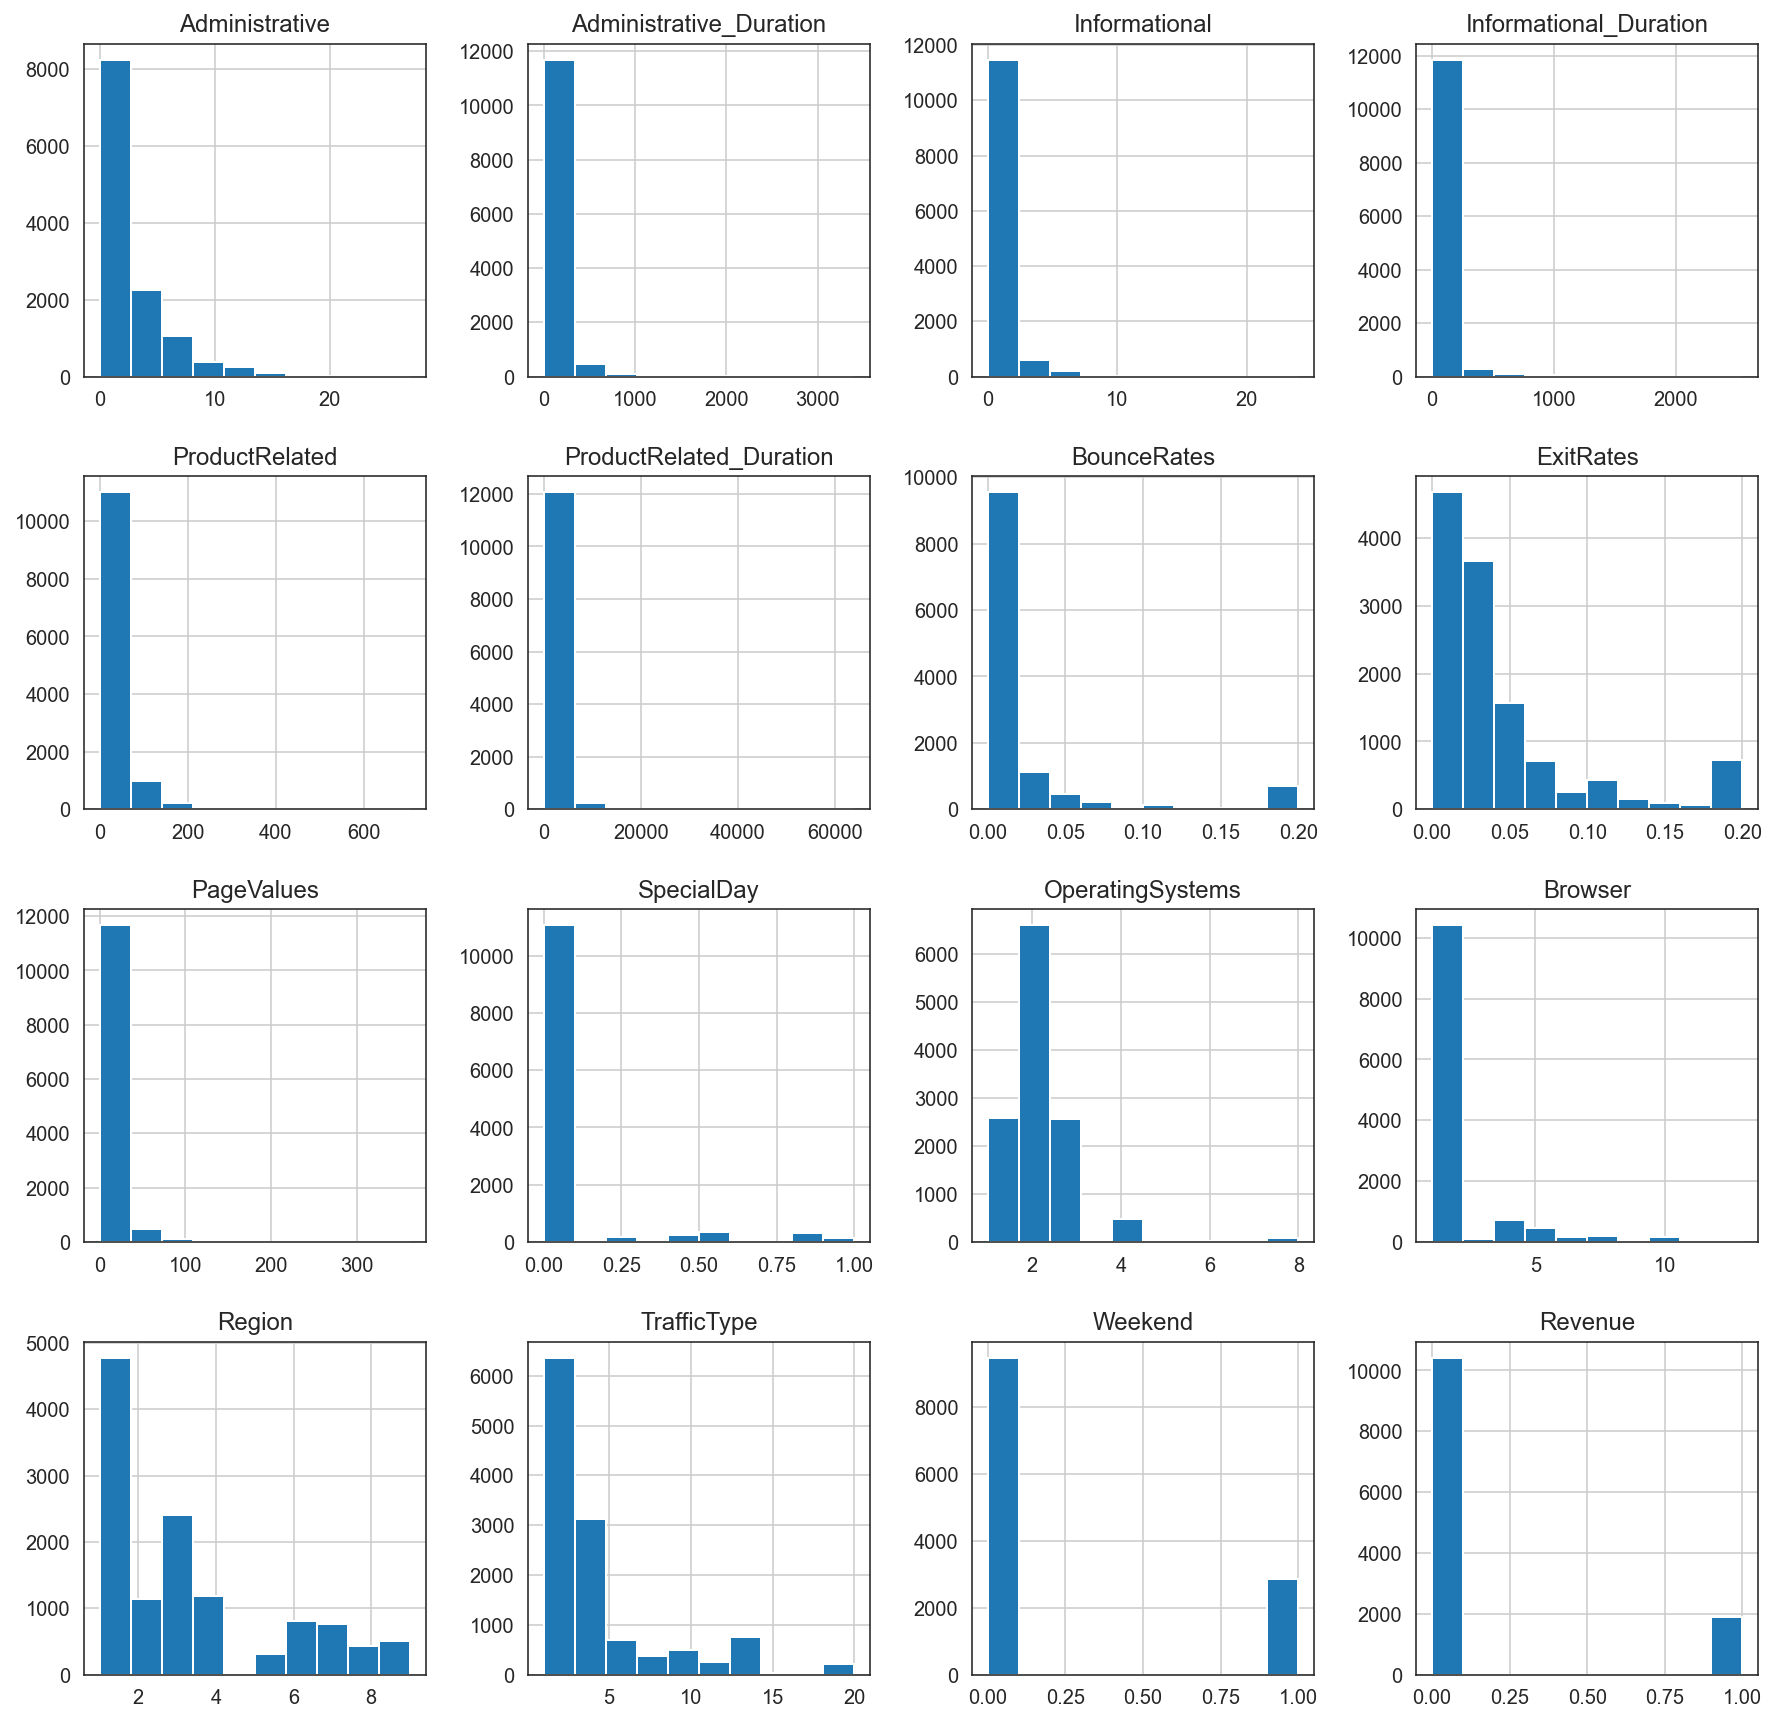

In [25]:
df[num].hist(figsize=(15, 15));

In [26]:
df[num].skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

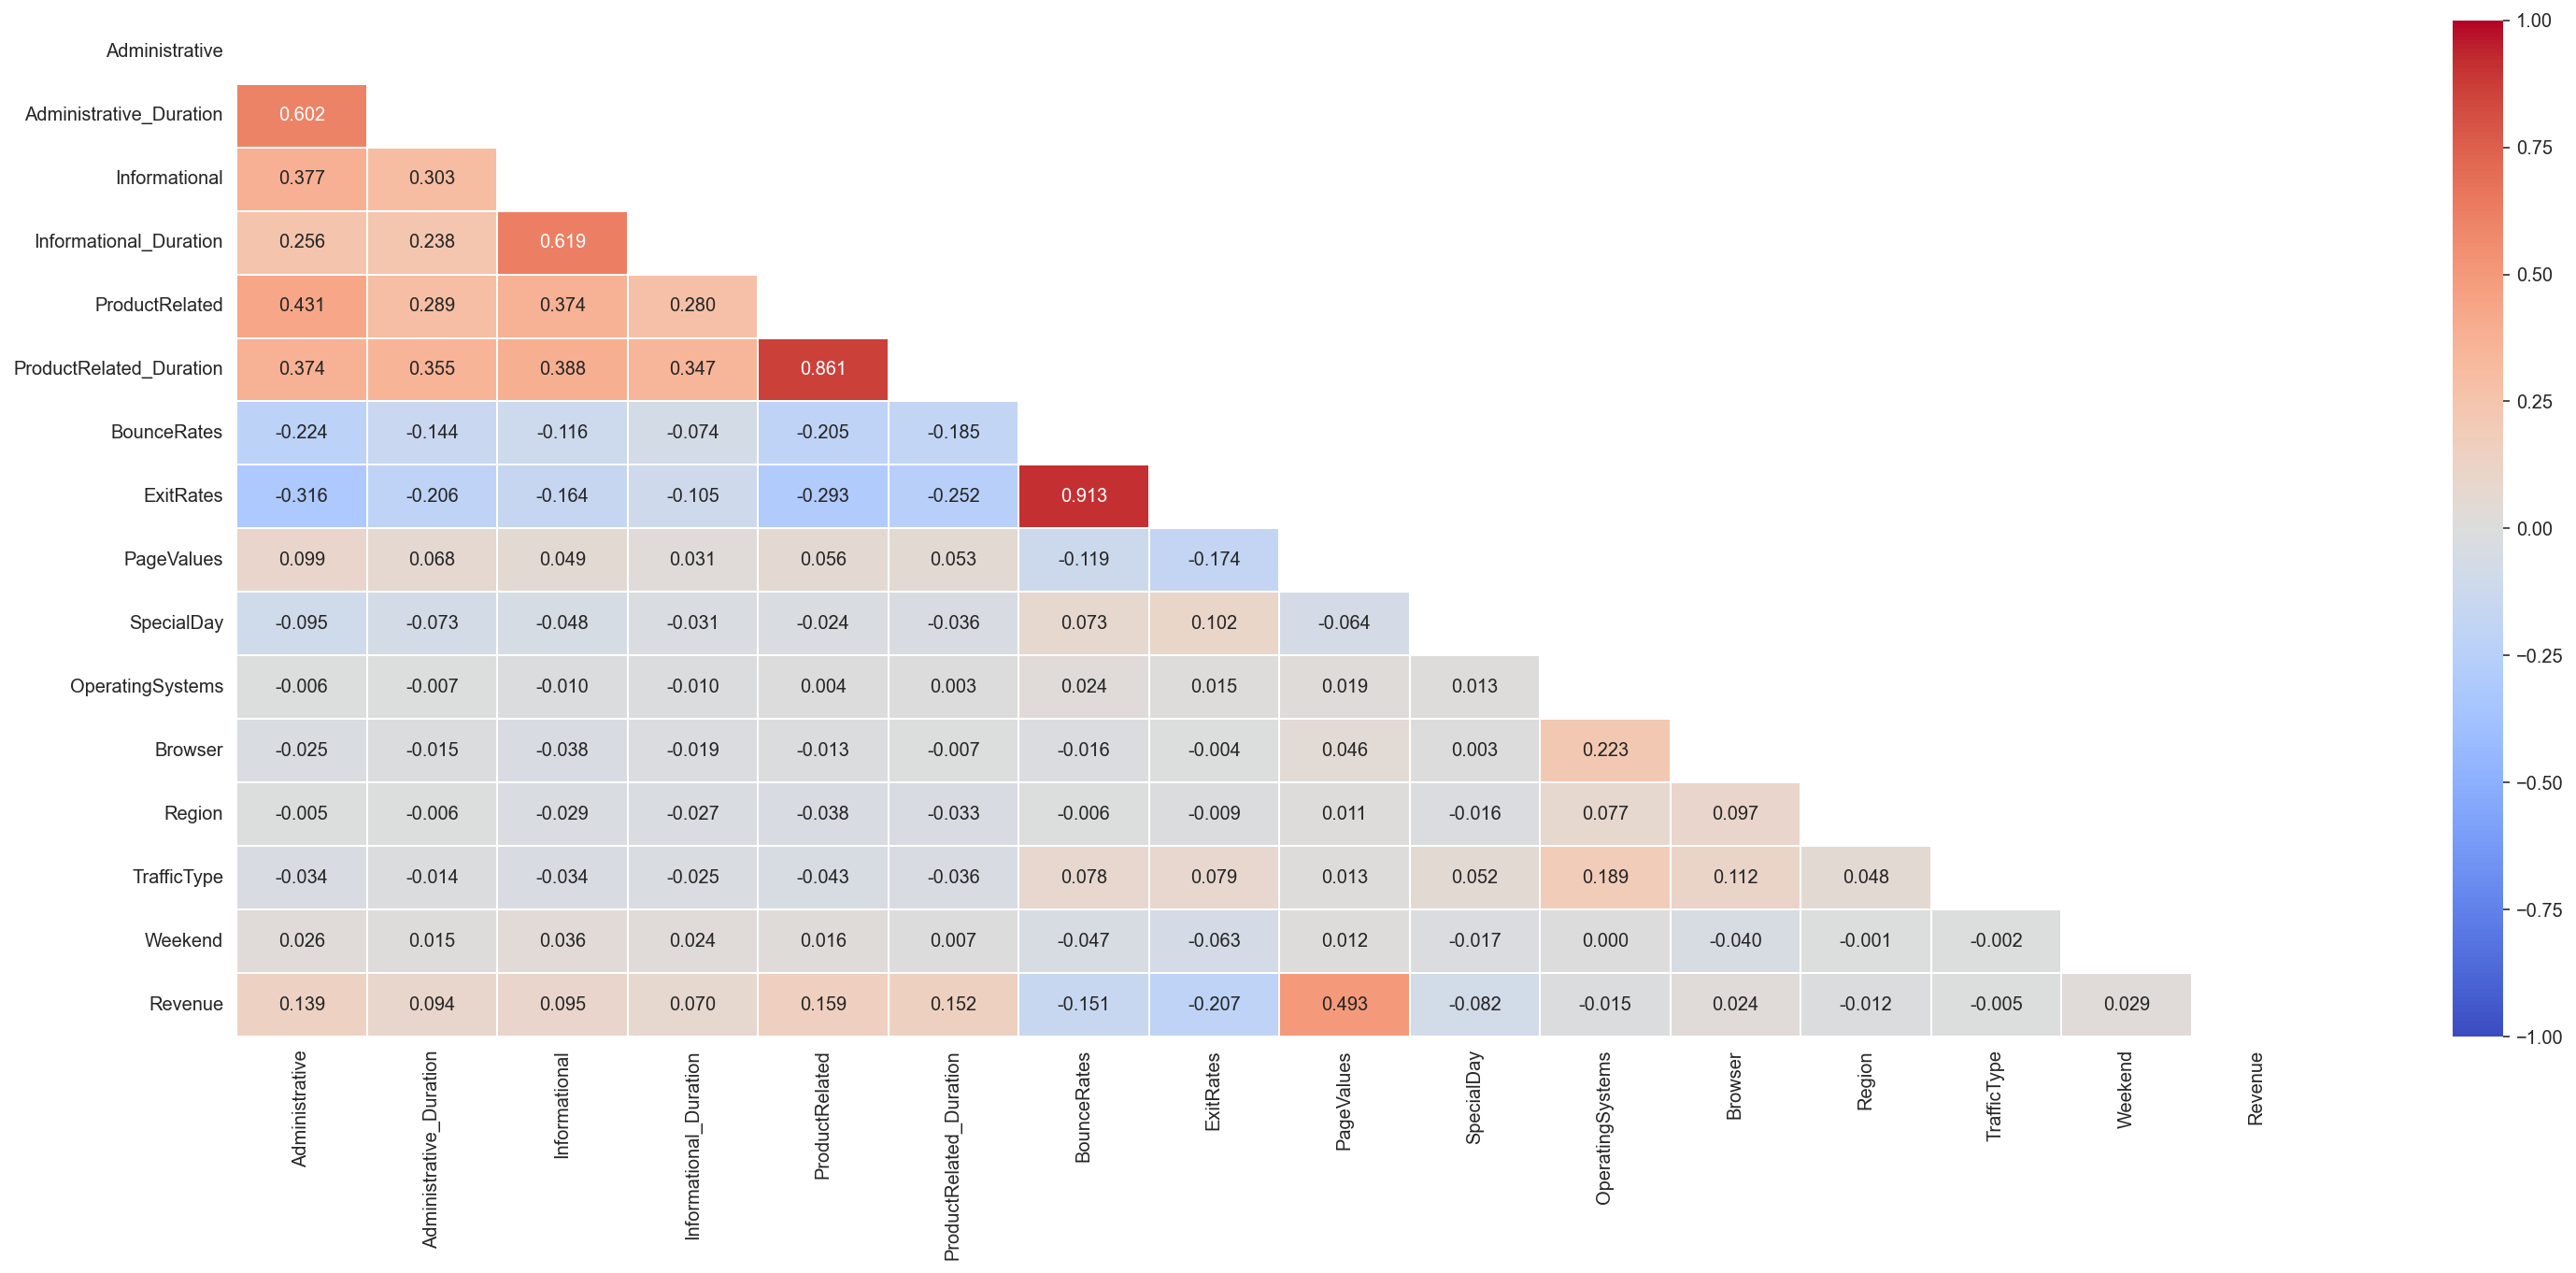

In [27]:
plt.figure(figsize=(25, 10))

corr_matrix = df[num].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(corr_matrix, 
                 mask=mask, 
                 xticklabels=corr_matrix.columns, 
                 yticklabels=corr_matrix.columns, 
                 annot=True,
                 fmt='.3f',
                 linewidths=.2, 
                 cmap='coolwarm', 
                 vmin=-1, vmax=1);

## Categorical Features

In [28]:
cat = df.select_dtypes(include='object').columns

In [29]:
print(f'The # of categorical features in the dataset is {len(cat)}')

The # of categorical features in the dataset is 2


In [30]:
print(f'The categorical features are:\n\n{cat}')

The categorical features are:

Index(['Month', 'VisitorType'], dtype='object')


In [31]:
df[cat].head()

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor


In [32]:
df[cat].describe().T

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551


In [33]:
for feature in cat:
    print(f'{feature}:\n{df[feature].unique()}\n')

Month:
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

VisitorType:
['Returning_Visitor' 'New_Visitor' 'Other']



In [34]:
for feature in cat:
    print(f'{feature}:\n\n{df[feature].value_counts()}\n')
    print(30 * '-')
    print()

Month:

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

------------------------------

VisitorType:

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

------------------------------



## Metric Selection

    The target feature 'Revenue' is imbalanced, so we'll use 'roc-auc' metric for model evaluation. We'll also take a look at the 'precision' and 'recall' metrics on the test set.


## Model Selection

    We will try four different tree based classifer models:
        - Decision Tree
        - Random Forest
        - Gradient Boosting
        - History Gradient Boosting

## Data Preparation

In [35]:
# Preprocessing 
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OrdinalEncoder

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, precision_score, recall_score

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier


In [36]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [38]:
df.shape

(12330, 18)

In [39]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']
print('The shape of X:', X.shape)
print('The shape of y:', y.shape)

The shape of X: (12330, 17)
The shape of y: (12330,)


In [40]:
num_selector = selector(dtype_exclude=object)
num_cols = num_selector(X)

cat_selector = selector(dtype_include=object)
cat_cols = cat_selector(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=999)

In [42]:
%%time

# Define data preprocessing tools
oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1) 

# Define cat and num preprocessing
cat_preprocessor = oe

# Combine num and cat preprocessing
ct = ColumnTransformer([
    ('cat', cat_preprocessor, cat_cols)],
    remainder = 'passthrough')


# Define Models
models = [DecisionTreeClassifier(random_state=999),
          RandomForestClassifier(random_state=999),
          GradientBoostingClassifier(random_state=999),
          HistGradientBoostingClassifier(random_state=999)]


# Models Evaluation Strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

scores = []
model_name = []

for model in models:
    # Define model pipeline
    pipe = Pipeline([('preprocessing', ct), ('model', model)])
    
    # CV model pipeline
    cv_scores = cross_val_score(pipe, X=X_train, y=y_train, 
                                scoring=metric, cv=skfold, n_jobs=-1, error_score='raise').mean() 
    # Fit model pipeline
    pipe.fit(X_train, y_train)
    
    # Predict model pipeline
    y_pred = pipe.predict(X_test)
    y_predprob = pipe.predict_proba(X_test)[:,1]
    
    # Append name of model and scores 
    model_name.append(model.__class__.__name__)
    scores.append(({
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 2),
        'ROC-AUC': round(roc_auc_score(y_test, y_predprob) * 100, 2),
        'Mean CV ROC-AUC': round(cv_scores * 100, 2),
        'Precision': round(precision_score(y_test, y_pred) * 100, 2),
        'Recall': round(recall_score(y_test, y_pred) * 100, 2)
    })) 
    
    # Print model and score 
    print(f'Model: {model}')
    print(f'Accuracy score: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')
    print(f'ROC-AUC score: {round(roc_auc_score(y_test, y_predprob) * 100 , 2)}%')
    print(f'Mean CV ROC-AUC score: {round(cv_scores * 100, 2)}%')
    print()
    print(40 * '-')
    print()

Model: DecisionTreeClassifier(random_state=999)
Accuracy score: 85.37%
ROC-AUC score: 73.78%
Mean CV ROC-AUC score: 73.1%

----------------------------------------

Model: RandomForestClassifier(random_state=999)
Accuracy score: 89.67%
ROC-AUC score: 92.64%
Mean CV ROC-AUC score: 92.11%

----------------------------------------

Model: GradientBoostingClassifier(random_state=999)
Accuracy score: 89.24%
ROC-AUC score: 93.0%
Mean CV ROC-AUC score: 93.04%

----------------------------------------

Model: HistGradientBoostingClassifier(random_state=999)
Accuracy score: 89.86%
ROC-AUC score: 92.98%
Mean CV ROC-AUC score: 92.91%

----------------------------------------

CPU times: user 5.25 s, sys: 196 ms, total: 5.44 s
Wall time: 11.4 s


In [43]:
results = pd.DataFrame(data=scores, columns=['Accuracy', 'ROC-AUC', 'Mean CV ROC-AUC', 'Precision', 'Recall'], index=model_name)
results.sort_values(by=['Mean CV ROC-AUC'], ascending=False, inplace=True)
results

,Accuracy,ROC-AUC,Mean CV ROC-AUC,Precision,Recall
GradientBoostingClassifier,89.24,93.00,93.04,68.43,56.47
HistGradientBoostingClassifier,89.86,92.98,92.91,70.39,59.44
RandomForestClassifier,89.67,92.64,92.11,71.49,55.24
DecisionTreeClassifier,85.37,73.78,73.10,52.50,56.99


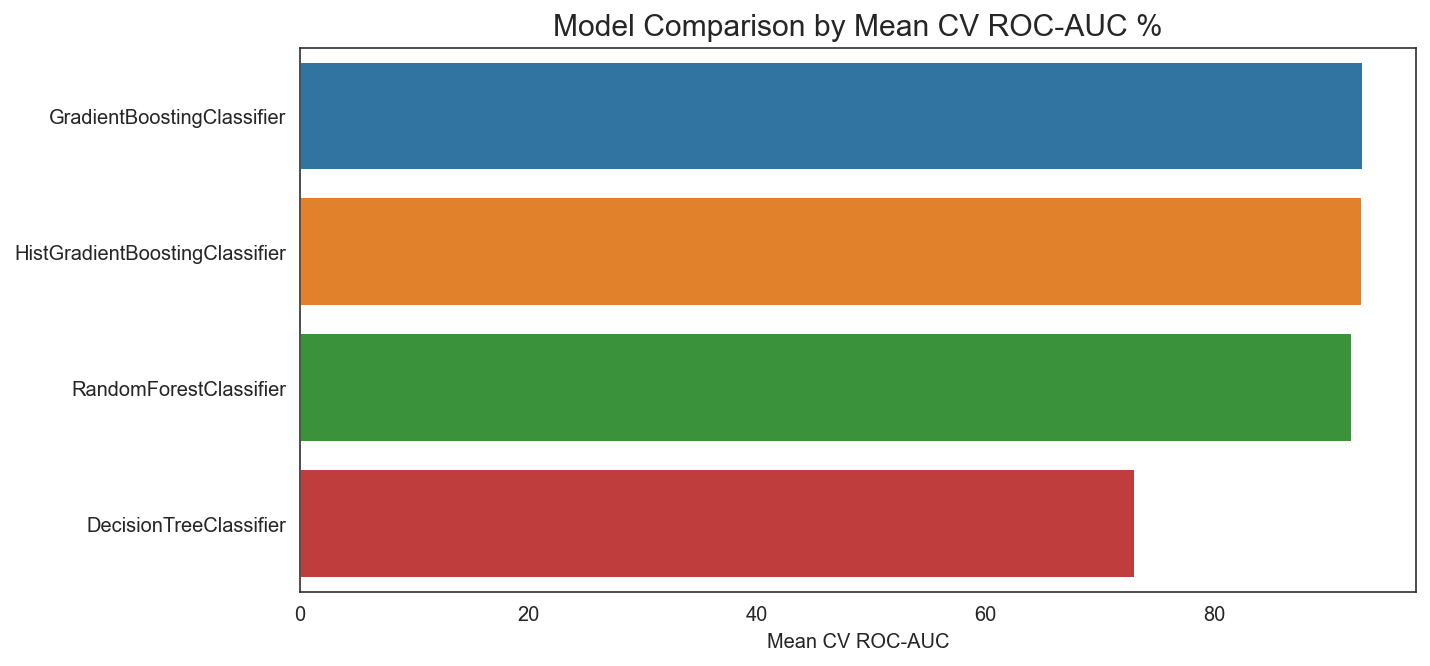

In [44]:
plt.figure(figsize=(10,5))
plt.title('Model Comparison by Mean CV ROC-AUC %', size=15)
sns.barplot(data=results, x='Mean CV ROC-AUC', y=results.index);

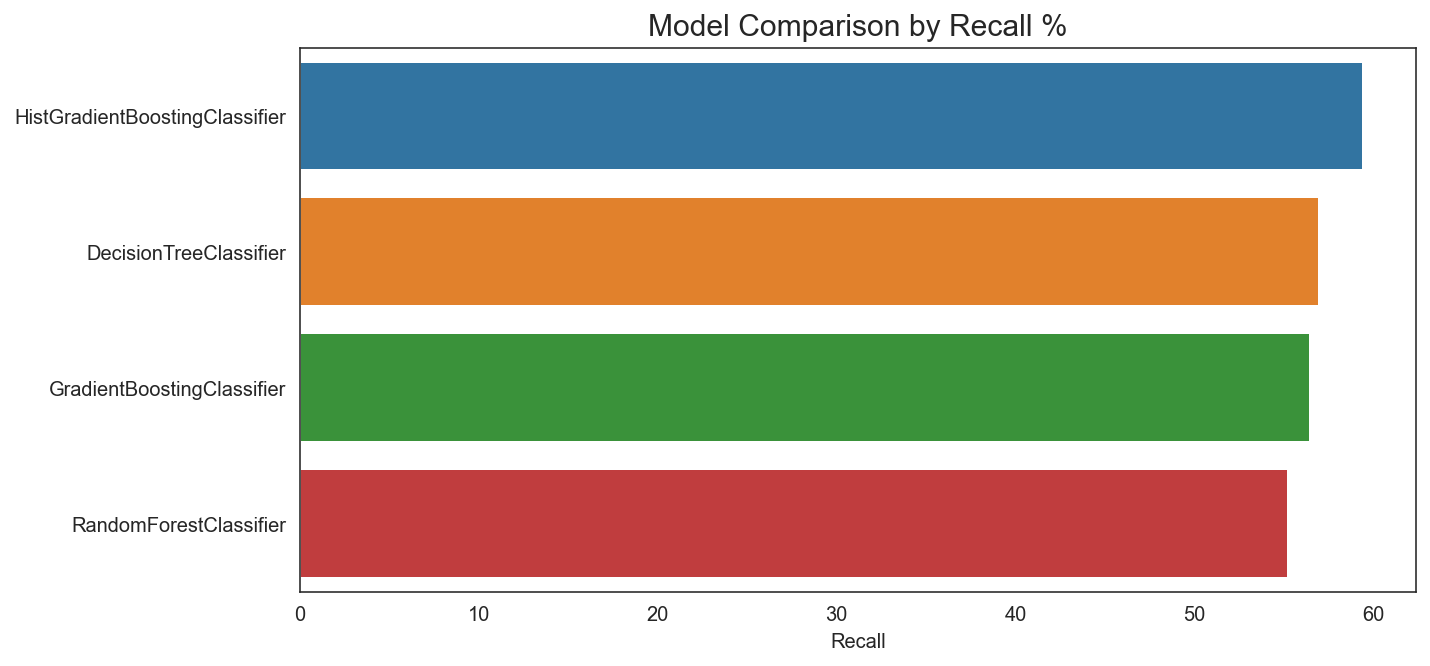

In [45]:
results.sort_values(by=['Recall'], ascending=False, inplace=True)
plt.figure(figsize=(10,5))
plt.title('Model Comparison by Recall %', size=15)
sns.barplot(data=results, x='Recall', y=results.index);

### Tune Best Model Found (GradientBoostingClassifer)

In [46]:
%%time

# Define data preprocessing tools
oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1) 

# Define cat and num preprocessing
cat_preprocessor = oe

# Combine num and cat preprocessing
ct = ColumnTransformer([
    ('cat', cat_preprocessor, cat_cols)],
    remainder = 'passthrough')

# Define model pipeline 
gbc_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', GradientBoostingClassifier(random_state=999))
])

# Define model pipeline parameter grid
gbc_param_grid = {
    'model__n_estimators': range(50, 500, 50),
    'model__max_depth': range(1, 10)
}

# Define model evaluation strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

gbc_rs = RandomizedSearchCV(gbc_pipe,
                            param_distributions=gbc_param_grid,
                            scoring=metric,
                            cv=skfold,
                            n_iter=10,
                            n_jobs=-1,
                            verbose=1,
                            error_score='raise')

gbc_rs.fit(X_train, y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: user 2.54 s, sys: 65.9 ms, total: 2.6 s
Wall time: 1min 56s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Month',
                                                                                'VisitorType'])])),
                                             ('model',
                                              GradientBoostingClassifier(random_state=999))]),
                   n_jobs=-1,
                   param_d

In [47]:
best_score = gbc_rs.best_score_
print(f'Best RandomizedSearchCV ROC-AUC Score: {(best_score * 100):.2f}%')
print(f'Best Model Parameters: {gbc_rs.best_params_}')

Best RandomizedSearchCV ROC-AUC Score: 93.05%
Best Model Parameters: {'model__n_estimators': 100, 'model__max_depth': 5}


In [48]:
print('Model Results:')
gbc_results = pd.DataFrame(gbc_rs.cv_results_)
gbc_results.sort_values(by=['rank_test_score'], ascending=True, inplace=True)
gbc_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

Model Results:


,params,mean_test_score,std_test_score,rank_test_score
8,"{'model__n_estimators': 100, 'model__max_depth...",0.930497,0.008890,1
3,"{'model__n_estimators': 250, 'model__max_depth...",0.929537,0.008209,2
1,"{'model__n_estimators': 150, 'model__max_depth...",0.928817,0.009327,3
9,"{'model__n_estimators': 300, 'model__max_depth...",0.928737,0.008648,4
6,"{'model__n_estimators': 200, 'model__max_depth...",0.928153,0.009114,5
7,"{'model__n_estimators': 400, 'model__max_depth...",0.923765,0.010404,6
5,"{'model__n_estimators': 300, 'model__max_depth...",0.923641,0.009233,7
4,"{'model__n_estimators': 450, 'model__max_depth...",0.920928,0.010605,8
0,"{'model__n_estimators': 300, 'model__max_depth...",0.916314,0.007599,9
2,"{'model__n_estimators': 450, 'model__max_depth...",0.916219,0.007614,10


In [49]:
print('The best GradientBoosting model is saved!!')
gbc = gbc_rs.best_estimator_
gbc

The best GradientBoosting model is saved!!


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Month', 'VisitorType'])])),
                ('model',
                 GradientBoostingClassifier(max_depth=5, random_state=999))])

In [50]:
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_predprob = gbc.predict_proba(X_test)[:,1]

In [51]:
roc_auc_prob = roc_auc_score(y_test, gbc_predprob)
print(f'The ROC-AUC test score: {(roc_auc_prob * 100):.2f}%')

The ROC-AUC test score: 93.07%


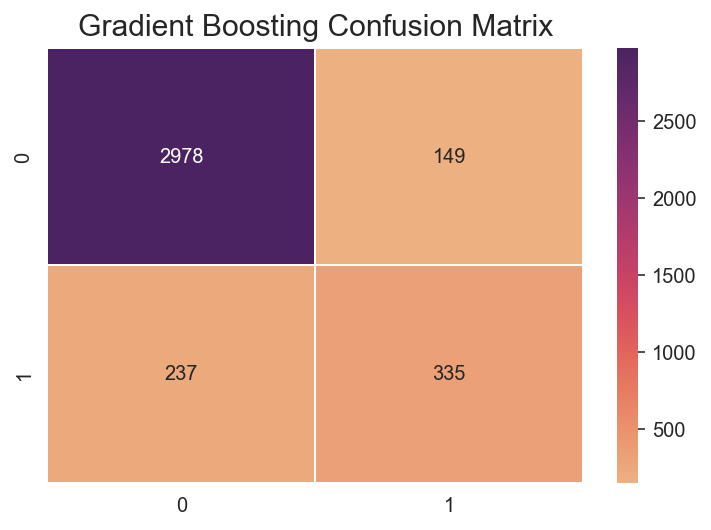

In [52]:
confusion_matrix = confusion_matrix(y_test, gbc_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', linewidths=0.75, cmap='flare')
plt.title('Gradient Boosting Confusion Matrix', size=15);

In [53]:
classification_report = classification_report(y_test, gbc_pred)
print(f'Gradient Boosting Classification Report:\n\n{classification_report}')

Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3127
           1       0.69      0.59      0.63       572

    accuracy                           0.90      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699



In [54]:
precision = precision_score(y_test, gbc_pred)
print(f'The precision test score is: {(precision * 100):.2f}%')

The precision test score is: 69.21%


In [55]:
recall = recall_score(y_test, gbc_pred)
print(f'The recall test score is: {(recall * 100):.2f}%')

The recall test score is: 58.57%


In [56]:
%%time

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

gbc_cv_score = cross_val_score(gbc,
                               X_train, y_train,
                               cv=outer_cv,
                               scoring=metric,
                               n_jobs=-1,
                               error_score='raise')

print(f'The mean CV ROC-AUC score: {(gbc_cv_score.mean() * 100):.2f}% +/- {(gbc_cv_score.std() * 100):.2f} std')

The mean CV ROC-AUC score: 93.05% +/- 0.89 std
CPU times: user 159 ms, sys: 10.7 ms, total: 170 ms
Wall time: 4.89 s


In [57]:
gbc_best_model_results = pd.DataFrame(gbc_cv_score, columns=['GBC'])
gbc_best_model_results.sort_values(by=['GBC'], ascending=False, inplace=True)
gbc_best_model_results

,GBC
9,0.946199
0,0.941096
4,0.938773
8,0.933876
6,0.930178
2,0.926878
7,0.926676
3,0.923643
1,0.920306
5,0.917347


### Tune Best Model Found by Recall (HistGradientBoostingClassifer)

In [58]:
%%time

# Define data preprocessing tools
oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1) 

# Define cat and num preprocessing
cat_preprocessor = oe

# Combine num and cat preprocessing
ct = ColumnTransformer([
    ('cat', cat_preprocessor, cat_cols)],
    remainder = 'passthrough')

# Define model pipeline 
hgb_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', HistGradientBoostingClassifier(random_state=999))
])

# Define model pipeline parameter grid
hgb_param_grid = {
    'model__max_iter': range (100, 1000),
    'model__max_depth': range(1, 10),
    'model__learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
}

# Define model evaluation strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

hgb_rs = RandomizedSearchCV(hgb_pipe,
                            param_distributions=hgb_param_grid,
                            scoring=metric,
                            cv=skfold,
                            n_iter=10,
                            n_jobs=-1,
                            verbose=1,
                            error_score='raise')

hgb_rs.fit(X_train, y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: user 5.26 s, sys: 88.8 ms, total: 5.35 s
Wall time: 37.7 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Month',
                                                                                'VisitorType'])])),
                                             ('model',
                                              HistGradientBoostingClassifier(random_state=999))]),
                   n_jobs=-1,
                   par

In [59]:
hgb_best_score = hgb_rs.best_score_
print(f'Best RandomizedSearchCV ROC-AUC Score: {(hgb_best_score * 100):.2f}%')
print(f'Best Model Parameters: {hgb_rs.best_params_}')

Best RandomizedSearchCV ROC-AUC Score: 92.89%
Best Model Parameters: {'model__max_iter': 830, 'model__max_depth': 2, 'model__learning_rate': 0.01}


In [60]:
print('Model Results:')
hgb_results = pd.DataFrame(hgb_rs.cv_results_)
hgb_results.sort_values(by=['rank_test_score'], ascending=True, inplace=True)
hgb_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

Model Results:


,params,mean_test_score,std_test_score,rank_test_score
2,"{'model__max_iter': 830, 'model__max_depth': 2...",0.928921,0.009118,1
1,"{'model__max_iter': 256, 'model__max_depth': 4...",0.928815,0.008790,2
5,"{'model__max_iter': 274, 'model__max_depth': 6...",0.928432,0.007672,3
4,"{'model__max_iter': 139, 'model__max_depth': 8...",0.928032,0.010234,4
6,"{'model__max_iter': 990, 'model__max_depth': 8...",0.914375,0.009921,5
0,"{'model__max_iter': 841, 'model__max_depth': 6...",0.914137,0.009351,6
8,"{'model__max_iter': 254, 'model__max_depth': 6...",0.913787,0.010236,7
3,"{'model__max_iter': 564, 'model__max_depth': 7...",0.910109,0.007608,8
9,"{'model__max_iter': 732, 'model__max_depth': 5...",0.908107,0.011018,9
7,"{'model__max_iter': 246, 'model__max_depth': 1...",0.852323,0.012138,10


In [61]:
print('The best HistGradientBoosting model is saved!!')
hgb = hgb_rs.best_estimator_
hgb

The best HistGradientBoosting model is saved!!


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Month', 'VisitorType'])])),
                ('model',
                 HistGradientBoostingClassifier(learning_rate=0.01, max_depth=2,
                                                max_iter=830,
                                                random_state=999))])

In [62]:
hgb.fit(X_train, y_train)
hgb_pred = hgb.predict(X_test)
hgb_predprob = hgb.predict_proba(X_test)[:,1]

In [63]:
roc_auc_prob = roc_auc_score(y_test, hgb_predprob)
print(f'The ROC-AUC test score: {(roc_auc_prob * 100):.2f}%')

The ROC-AUC test score: 92.70%


In [64]:
precision = precision_score(y_test, hgb_pred)
print(f'The precision test score is: {(precision * 100):.2f}%')

The precision test score is: 69.63%


In [65]:
recall = recall_score(y_test, hgb_pred)
print(f'The recall test score is: {(recall * 100):.2f}%')

The recall test score is: 56.12%


In [66]:
%%time

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

hgb_cv_score = cross_val_score(hgb,
                               X_train, y_train,
                               cv=outer_cv,
                               scoring=metric,
                               n_jobs=-1,
                               error_score='raise')

print(f'The mean CV ROC-AUC score: {(hgb_cv_score.mean() * 100):.2f}% +/- {(hgb_cv_score.std() * 100):.2f} std')

The mean CV ROC-AUC score: 92.89% +/- 0.91 std
CPU times: user 347 ms, sys: 60.1 ms, total: 407 ms
Wall time: 2.37 s


In [67]:
hgb_best_model_results = pd.DataFrame(hgb_cv_score, columns=['HGB'])
hgb_best_model_results.sort_values(by=['HGB'], ascending=False, inplace=True)
hgb_best_model_results

,HGB
0,0.942272
9,0.941281
8,0.936549
4,0.933895
6,0.933376
2,0.923101
7,0.921902
3,0.921376
1,0.919600
5,0.915858


In [68]:
final_model_results = pd.concat([gbc_best_model_results, hgb_best_model_results], axis=1)
final_model_results

,GBC,HGB
0,0.941096,0.942272
1,0.920306,0.919600
2,0.926878,0.923101
3,0.923643,0.921376
4,0.938773,0.933895
5,0.917347,0.915858
6,0.930178,0.933376
7,0.926676,0.921902
8,0.933876,0.936549
9,0.946199,0.941281


In [69]:
final_model_results.describe().T

,count,mean,std,min,25%,50%,75%,max
GBC,10.0,0.930497,0.009371,0.917347,0.924401,0.928528,0.937549,0.946199
HGB,10.0,0.928921,0.009611,0.915858,0.921507,0.928238,0.935885,0.942272


### Save Models

In [70]:
# Fit best model on all the data
gbc.fit(X, y);
hgb.fit(X, y);

In [71]:
import joblib
joblib.dump(gbc, 'online_shopper_gbc_model_v1.pkl', compress=1)
joblib.dump(hgb, 'online_shopper_hgb_model_v1.pkl', compress=1)
print('Best Models Saved!!')

Best Models Saved!!


## Conclusions

So this is the end. We trained two models on imbalanced data and each of them showed quite a high mean CV ROC AUC score: 93.05% for GradientBoostingClassifer and 92.89% for HistoryGradientBoostingClassifer. 

When integrated with other module to determine likelihood of visitor to leave the site (I mentioned in the beginning), company can use this classification model to show individual special offers to such visitors before they leave shop website.

## Reproducibility

In [72]:
%load_ext watermark
%watermark -a 'Rainier Goubault' -nmv --packages numpy,pandas,scipy,sklearn,matplotlib,seaborn

Author: Rainier Goubault

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.27.0

numpy     : 1.21.2
pandas    : 1.3.3
scipy     : 1.7.1
sklearn   : 0.24.2
matplotlib: 3.4.3
seaborn   : 0.11.2

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

